## Importing Libraries:

In [1]:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset 

df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [4]:
df.shape                                                                                                #checking shape of data


(6405008, 18)

In [5]:
df.dtypes                                                          #checking datatype of each column for correction if required

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])       #correcting datatype for datetime columns 
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])     #from object to date-time

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
#Feature Extraction (Feature Engineering)

df['duration']= df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']               #adding duration column to dataframe


In [9]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
3004340,1.0,2020-01-16 12:33:36,2020-01-16 12:51:24,1.0,4.00,1.0,N,12,144,1.0,16.0,2.5,0.5,3.85,0.0,0.3,23.15,2.5,0 days 00:17:48
187151,2.0,2020-01-02 08:55:37,2020-01-02 09:01:50,1.0,1.30,1.0,N,143,163,1.0,6.5,0.0,0.5,2.45,0.0,0.3,12.25,2.5,0 days 00:06:13
3101063,2.0,2020-01-16 19:10:27,2020-01-16 19:13:32,3.0,0.49,1.0,N,140,141,2.0,4.0,1.0,0.5,0.00,0.0,0.3,8.30,2.5,0 days 00:03:05
3078937,2.0,2020-01-16 17:09:43,2020-01-16 17:15:55,1.0,1.01,1.0,N,237,236,1.0,6.0,1.0,0.5,2.58,0.0,0.3,12.88,2.5,0 days 00:06:12
1351215,1.0,2020-01-08 16:28:52,2020-01-08 16:38:55,1.0,1.60,1.0,N,141,142,1.0,8.5,3.5,0.5,2.55,0.0,0.3,15.35,2.5,0 days 00:10:03


In [10]:
df['duration']= df['duration'].dt.total_seconds()/60                          #duration time in minutes

In [11]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
5130916,2.0,2020-01-26 12:29:52,2020-01-26 12:39:29,1.0,1.43,1.0,N,264,264,1.0,8.5,0.0,0.5,1.86,0.0,0.3,11.16,0.0,9.616667
5119898,2.0,2020-01-26 11:38:18,2020-01-26 11:57:11,6.0,3.41,1.0,N,50,238,1.0,16.5,0.0,0.5,0.00,0.0,0.3,17.30,0.0,18.883333
5593425,2.0,2020-01-28 19:21:15,2020-01-28 19:30:34,2.0,1.24,1.0,N,142,143,1.0,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,9.316667
1853387,2.0,2020-01-10 20:37:53,2020-01-10 20:51:50,1.0,1.88,1.0,N,163,233,2.0,10.5,0.5,0.5,0.00,0.0,0.3,14.30,2.5,13.950000
2593119,2.0,2020-01-14 14:25:46,2020-01-14 14:30:00,1.0,0.57,1.0,N,143,143,1.0,4.5,0.0,0.5,1.17,0.0,0.3,8.97,2.5,4.233333


In [12]:
df= df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]          #required columns out of all

In [13]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [14]:
df.isnull().sum()                                   #checking for null value count

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [15]:
(df['passenger_count'].isnull().sum()/len(df)) * 100              #checking for percentage of null values compared to whole data
(df['payment_type'].isnull().sum()/len(df)) * 100                 #percentage is less can drop the null values (i.e 1.02%)

1.021716132126611

In [16]:
df.dropna(inplace = True)                                                                    #dropping null values from dataset

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [18]:
df['passenger_count'] = df['passenger_count'].astype('int64')         #as passenger count can't be float converting to integer
df['payment_type'] = df['payment_type'].astype('int64')

In [19]:
df[df.duplicated()]                                                                               #checking for duplicate rows

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [20]:
df.drop_duplicates(inplace = True)                                                                    #dropping duplicate values

In [21]:
df.shape

(3007861, 5)

In [22]:
df['passenger_count'].value_counts(normalize = True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [23]:
df['payment_type'].value_counts(normalize = True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [24]:
df = df[df['payment_type']<3]                                           #filtering dataframe according to required payment type
                                                                        #categorical encoded data

In [25]:
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]        #filtering dataframe w.r.t feasible passenger count normally

In [26]:
df.shape

(2780283, 5)

In [27]:
df['payment_type'].replace([1,2],['Card','Cash'], inplace = True)          #replace encoded payment type data with actual values

In [28]:
df.head(10)

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.00,1.20,4.800000
1,1,Card,7.00,1.20,7.416667
2,1,Card,6.00,0.60,6.183333
3,1,Card,5.50,0.80,4.850000
4,1,Cash,3.50,0.00,2.300000
5,1,Cash,2.50,0.03,0.883333
6,1,Card,2.50,0.00,0.066667
7,1,Card,0.01,0.00,1.166667
8,4,Card,2.50,0.00,1.000000
9,2,Card,8.00,0.70,11.450000


In [29]:
df.describe()                                                                               #give insights w.r.t numerical data

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [30]:
df = df[df['fare_amount']>0]                                                         #removing outlier values from the dataframe
df = df[df['trip_distance']>0]                                                       #(i.e. negative values)
df = df[df['duration']>0]

In [31]:
df.describe()                                                                                    #insights after outlier removal

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x204d51cc190>,
 'caps': [<matplotlib.lines.Line2D at 0x204a95db7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204fda0b390>],
 'medians': [<matplotlib.lines.Line2D at 0x204fda1e790>],
 'fliers': [<matplotlib.lines.Line2D at 0x204dd57eed0>],
 'means': []}

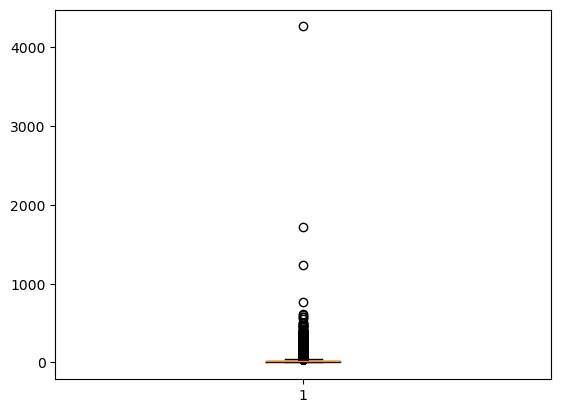

In [32]:
plt.boxplot(df['fare_amount'])                                                                  #checking for outliers visually

In [33]:
for col in ['fare_amount','trip_distance','duration']:                                      #Calculating IQR for outlier removal
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3- Q1
    
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]                                

In [34]:
df                                                                                             #dataframe after removing outlier

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


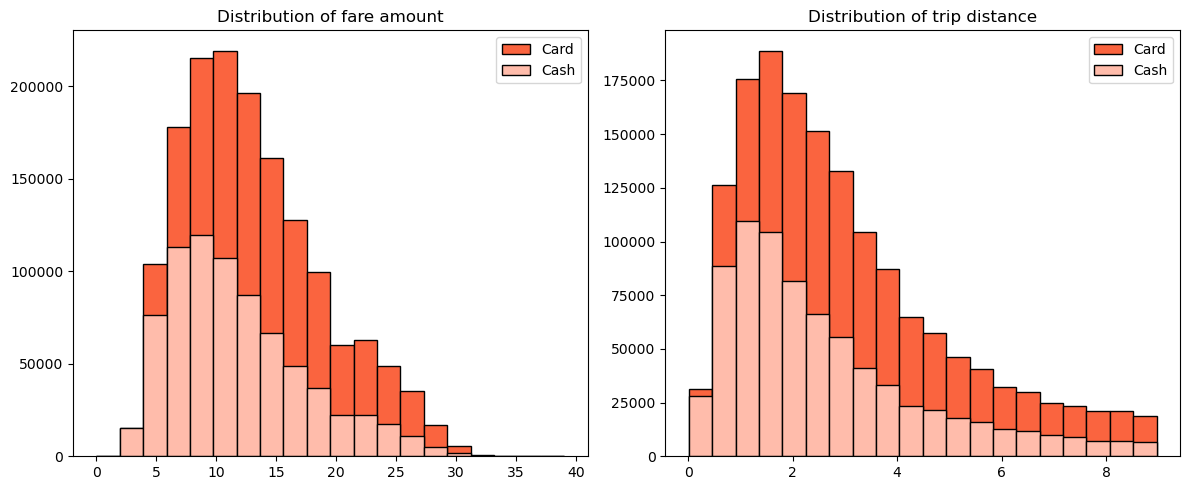

In [35]:
plt.figure(figsize=(12,5))  

# First subplot
plt.subplot(1, 2, 1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.legend()

# Second subplot
plt.subplot(1, 2, 2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.legend()

plt.tight_layout() 

plt.show()

In [36]:
df.groupby('payment_type').agg({'fare_amount' : ['mean','std'], 'trip_distance' : ['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

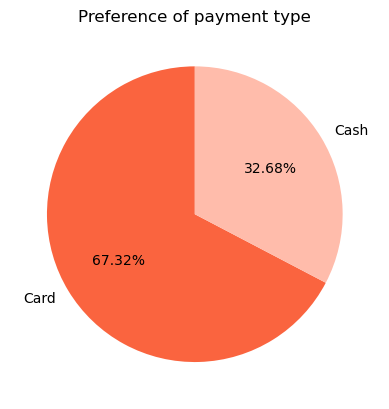

In [37]:
plt.title('Preference of payment type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = False, autopct = '%1.2f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

In [38]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count' : 'count'}, inplace = True)
passenger_count.reset_index(inplace= True)

In [39]:
passenger_count['percent'] = (passenger_count['count']/ passenger_count['count'].sum())*100

In [40]:
passenger_count

,payment_type,passenger_count,count,percent
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [41]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [42]:
df_dummy = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df_dummy['payment_type'] = ['Card','Card']
df_dummy.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df_dummy.iloc[1,1:] = passenger_count.iloc[5: ,-1]

In [43]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [44]:
df_dummy

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Card,20.042143,6.765806,2.371984,1.423686,2.072581


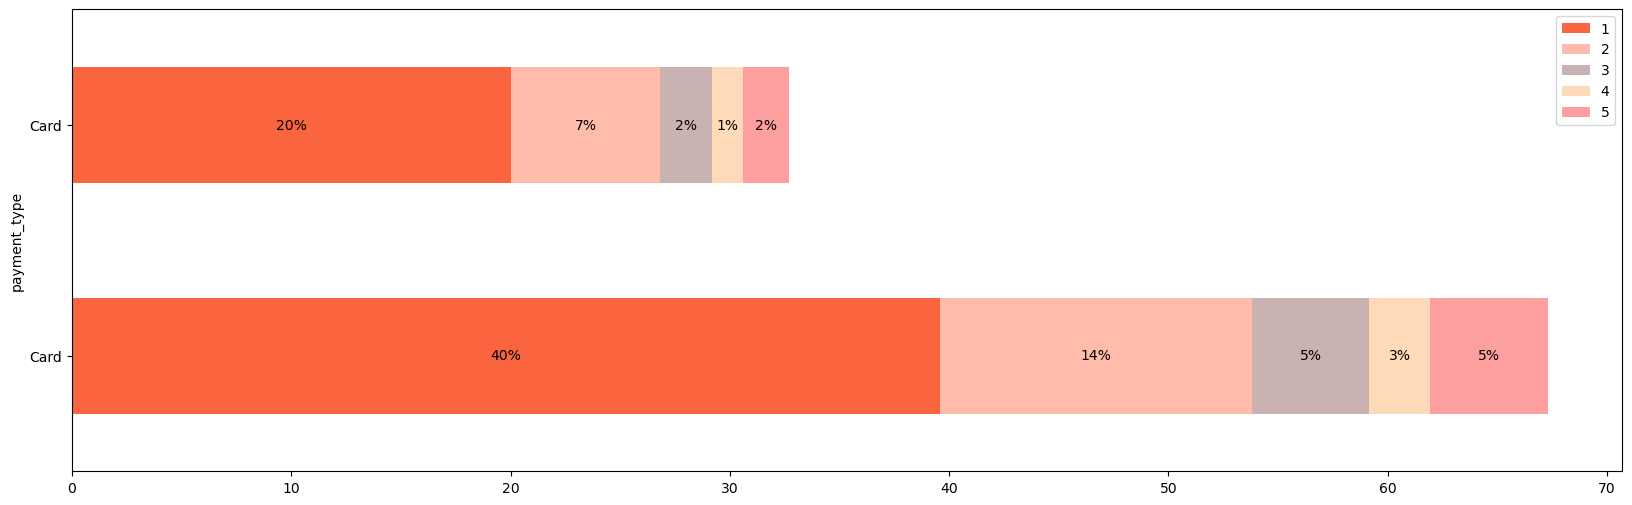

In [45]:
fig, ax = plt.subplots(figsize = (20,6))

df_dummy.plot(x= 'payment_type', kind = 'barh', stacked = True, ax = ax ,color = ['#FA643F','#FFBCAB','#CBB2B2','#FFDAB9','#FD9F9F'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width/2, y + height/2, '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center')


#### NULL HYPOTHESIS: 
There is no difference in average fare between customers who use credit cards and customers who use cash.

#### ALTERNATE HYPOTHESIS: 
There is a difference in average fare between customers who use credit cards and customers who use cash.

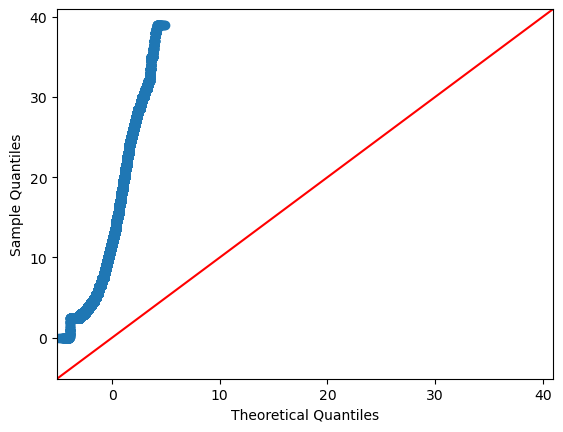

In [46]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [47]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [48]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)

print('T statstic:', t_stats,'p-value:',p_value)

T statstic: 169.2111527245052 p-value: 0.0


#### - As the p-value is below 0.05, thus can reject the null hypothesis.

###  Conclusion: 
There is a significant difference in the average fare between credit card and cash users.

### Recommendations:
- Encourage customers to pay with credit cards to capitalize on the potential for generating more revenue for taxi cab drivers.

- Implement strategies such as offering incentives or discounts for credit card transactions to incentivize customers to choose this payment method.

- Provide seamless and secure credit card payment options to enhance customer convenience and encourage adoption of this preferred payment method.